In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Lung Cancer data.csv')

In [3]:
data.head(5)

,Sr.No.,City,Age,Pop,Cases
0,1,Fredericia,40-54,3059,11
1,2,Horsens,40-54,2879,13
2,3,Kolding,40-54,3142,4
3,4,Vejle,40-54,2520,5
4,5,Fredericia,55-59,800,11


In [4]:
data.isnull().sum()

Sr.No.    0
City      0
Age       0
Pop       0
Cases     0
dtype: int64

In [5]:
data.shape

(24, 5)

In [6]:
data=data.drop('Sr.No.',axis=1)

In [7]:
data.describe()

,Pop,Cases
count,24.000000,24.000000
mean,1100.333333,9.333333
std,842.232730,3.157691
min,509.000000,2.000000
25%,628.000000,7.000000
50%,791.000000,10.000000
75%,954.750000,11.000000
max,3142.000000,15.000000


In [8]:
data.describe(include='all')

,City,Age,Pop,Cases
count,24,24,24.000000,24.000000
unique,4,6,NaN,NaN
top,Kolding,55-59,NaN,NaN
freq,6,4,NaN,NaN
mean,NaN,NaN,1100.333333,9.333333
std,NaN,NaN,842.232730,3.157691
min,NaN,NaN,509.000000,2.000000
25%,NaN,NaN,628.000000,7.000000
50%,NaN,NaN,791.000000,10.000000
75%,NaN,NaN,954.750000,11.000000


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

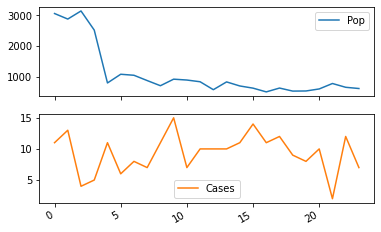

In [9]:
data.plot(subplots=True)

In [10]:
data.corr(method='pearson')

,Pop,Cases
Pop,1.0000,-0.1828
Cases,-0.1828,1.0000


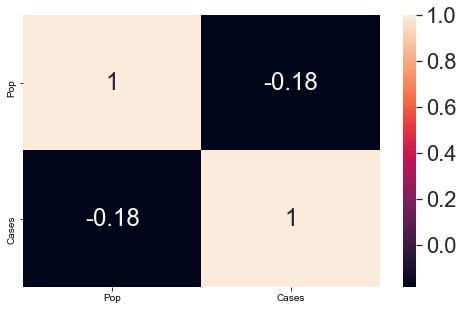

In [11]:
plt.subplots(figsize=(8,5))
sns.set(font_scale=2)
sns.heatmap(data.corr(), annot=True)
plt.show()

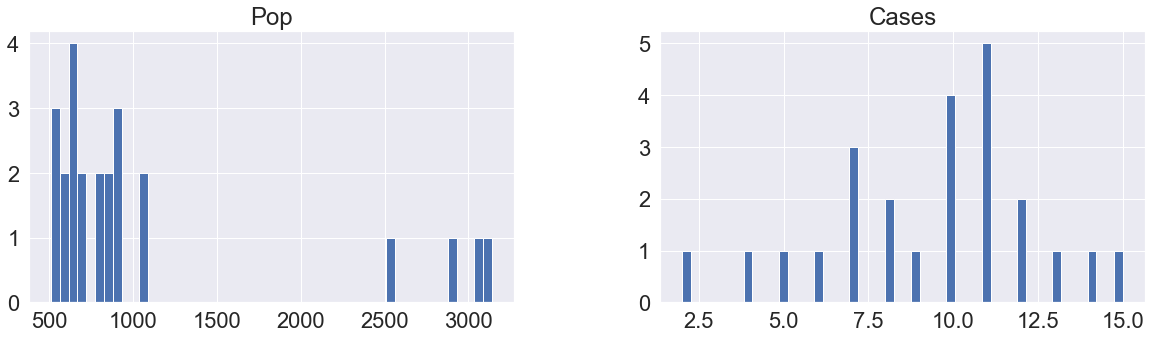

In [12]:
data.hist(bins=50,figsize=(20,5))
plt.show()

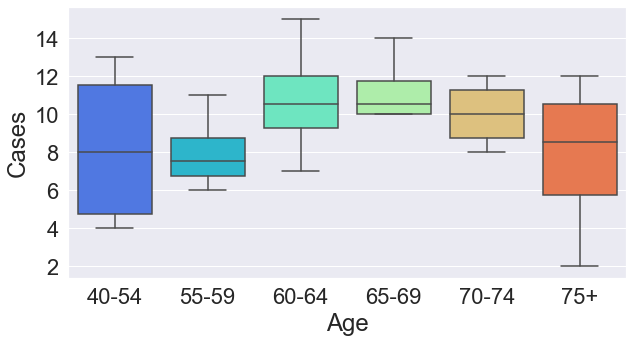

In [13]:
plt.subplots(figsize=(10,5))
sns.set(font_scale=1.5)
sns.boxplot(x ='Age',y = 'Cases',data = data,palette ='rainbow')   ##Checking Outliers  
plt.show()

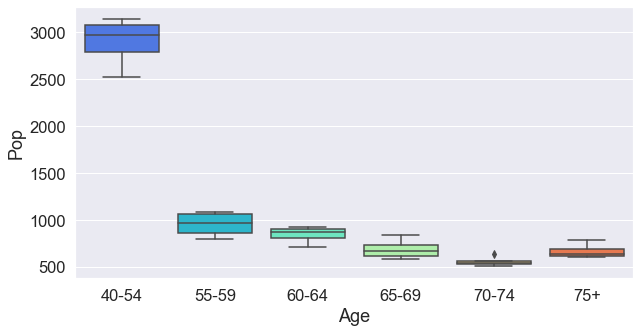

In [14]:
plt.subplots(figsize=(10,5))
sns.set(font_scale=1.5)
sns.boxplot(x ='Age',y = 'Pop',data = data,palette ='rainbow')   ##Checking Outliers  
plt.show()

<AxesSubplot:xlabel='City', ylabel='count'>

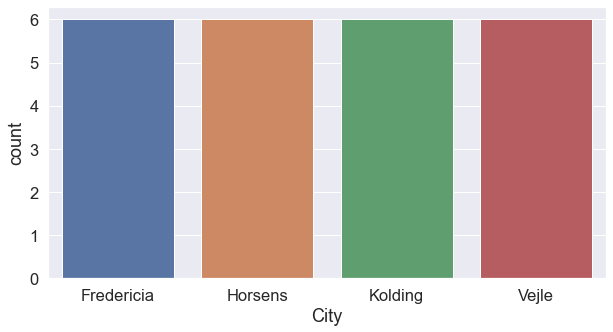

In [15]:
plt.subplots(figsize=(10,5))
sns.set(font_scale=1.5)
sns.countplot(x= "City", data = data)

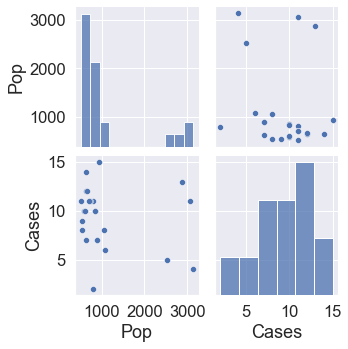

In [16]:
sns.set(font_scale=1.5)
sns.pairplot(data)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cases', ylabel='Density'>

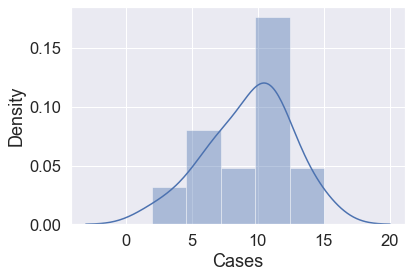

In [17]:
figsize=(20,15)
sns.distplot(data['Cases']) 

In [18]:
crosstab11=pd.crosstab(index=data['Age'],columns=data['Cases'],dropna=True) 
crosstab11

Cases,2,4,5,6,7,8,9,10,11,12,13,14,15
Age,,,,,,,,,,,,,
40-54,0,1,1,0,0,0,0,0,1,0,1,0,0
55-59,0,0,0,1,1,1,0,0,1,0,0,0,0
60-64,0,0,0,0,1,0,0,1,1,0,0,0,1
65-69,0,0,0,0,0,0,0,2,1,0,0,1,0
70-74,0,0,0,0,0,1,1,0,1,1,0,0,0
75+,1,0,0,0,1,0,0,1,0,1,0,0,0


In [19]:
crosstab12=pd.crosstab(index=data['Age'],columns=data['Pop'],dropna=True) 
crosstab12

Pop,509,535,539,581,605,619,631,634,659,702,...,839,878,895,923,1050,1083,2520,2879,3059,3142
Age,,,,,,,,,,,,,,,,,,,,,
40-54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
55-59,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
60-64,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
65-69,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
70-74,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
75+,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from scipy import stats
from scipy.stats import chi2_contingency
print("Chi Square Test")
print("\n")

print("Null Hypothesis : There is no correlation between Age and Cases")
print("Alternative Hypothesis : There is correlation between Age and Cases")
print("\n")

chi, pval, dof, exp = chi2_contingency(crosstab11)
alpha=0.05

print("Chi Square Test statistic : %.3f, p value : %.6f" % (chi, pval))

if pval > alpha:
    print('Variables are no correlated (fail to reject H0)')
else:
    print('Variables are correlated (reject H0)') 

Chi Square Test


Null Hypothesis : There is no correlation between Age and Cases
Alternative Hypothesis : There is correlation between Age and Cases


Chi Square Test statistic : 57.000, p value : 0.586052
Variables are no correlated (fail to reject H0)


In [21]:
print("Chi Square Test")
print("\n")

print("Null Hypothesis : There is no correlation between Age and pop")
print("Alternative Hypothesis : There is correlation between Age and pop")
print("\n")

chi, pval, dof, exp = chi2_contingency(crosstab12)
alpha=0.05

print("Chi Square Test statistic : %.3f, p value : %.6f" % (chi, pval))

if pval > alpha:
    print('Variables are no correlated (fail to reject H0)')
else:
    print('Variables are correlated (reject H0)') 

Chi Square Test


Null Hypothesis : There is no correlation between Age and pop
Alternative Hypothesis : There is correlation between Age and pop


Chi Square Test statistic : 120.000, p value : 0.356120
Variables are no correlated (fail to reject H0)


In [22]:
crosstab13=pd.crosstab(index=data['Cases'],columns=data['Pop'],dropna=True)
crosstab13

Pop,509,535,539,581,605,619,631,634,659,702,...,839,878,895,923,1050,1083,2520,2879,3059,3142
Cases,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [23]:
print("Chi Square Test")
print("\n")

print("Null Hypothesis : There is no correlation between Cases and pop")
print("Alternative Hypothesis : There is correlation between Cases and pop")
print("\n")

chi, pval, dof, exp = chi2_contingency(crosstab13)
alpha=0.05

print("Chi Square Test statistic : %.3f, p value : %.6f" % (chi, pval))

if pval > alpha:
    print('Variables are no correlated (fail to reject H0)')
else:
    print('Variables are correlated (reject H0)') 

Chi Square Test


Null Hypothesis : There is no correlation between Cases and pop
Alternative Hypothesis : There is correlation between Cases and pop


Chi Square Test statistic : 288.000, p value : 0.297428
Variables are no correlated (fail to reject H0)


In [24]:
col1=list(data.columns.values)[3]
col2=list(data.columns.values)[2]
print("One sample T-Test")
print("\n")
print("Null Hypothesis : Sample data comes from a population with a specified mean")
print("Alternative Hypothesis : Sample data doesn\'t come from a population with a specified mean")
print("\n")

mean_value=34

test,p=stats.ttest_1samp(data[col1],23)

print(col1,"One sample T test statistic : %.3f, p value : %.6f" % (test, p))
if p > alpha:
    print(col1,"variable data", 'comes from a population with mean = %.2f (fail to reject H0)' % (mean_value))
else:
    print(col1,"variable data", 'doesn\'t comes from a population with mean = %.3f (reject H0)' % (mean_value)) 

One sample T-Test


Null Hypothesis : Sample data comes from a population with a specified mean
Alternative Hypothesis : Sample data doesn't come from a population with a specified mean


Cases One sample T test statistic : -21.203, p value : 0.000000
Cases variable data doesn't comes from a population with mean = 34.000 (reject H0)


In [25]:
print("Shapiro Wilk Test")
print("\n")
print("Null Hypothesis : Sample data of the variable is from Normal distribution")
print("Alternative Hypothesis : Sample data of the variable is not from from Normal distribution")
print("\n")

stat, p = stats.shapiro(data[[col1]])
stat_2, p_2 = stats.shapiro(data[[col2]])

print(col1 ," SW statistic : %.6f, p value : %.6f" % (stat, p))

print(col2 ," SW statistic : %.6f, p value : %.6f" % (stat_2, p_2))
print('\n')
# interpret
alpha = 0.05
if p > alpha:
    print(col1,"variable data" ,"is from Normal Distribution (fail to reject H0)")
else:
    print(col1,"variable data","is not from Normal Distribution (reject H0)")
    
print('\n')
if p_2 > alpha:
    print(col2,"variable data","is from Normal Distribution (fail to reject H0)")
else:
    print(col2,"variable data","is not from Normal Distribution (reject H0)")

Shapiro Wilk Test


Null Hypothesis : Sample data of the variable is from Normal distribution
Alternative Hypothesis : Sample data of the variable is not from from Normal distribution


Cases  SW statistic : 0.970083, p value : 0.669037
Pop  SW statistic : 0.636618, p value : 0.000002


Cases variable data is from Normal Distribution (fail to reject H0)


Pop variable data is not from Normal Distribution (reject H0)


from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data['City_N']=labelencoder.fit_transform(data['City'])
data

In [26]:
data['City'].unique()

array(['Fredericia', 'Horsens', 'Kolding', 'Vejle'], dtype=object)

In [27]:
data.head(1)

,City,Age,Pop,Cases
0,Fredericia,40-54,3059,11


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2], data.iloc[:,0],
                            test_size=0.2, random_state=0) 

In [29]:
x = np.array(X_train)
y = np.array(y_train)

In [30]:
X=np.array(X_test)
Y=np.array(y_test)

In [31]:
data.head(1)

,City,Age,Pop,Cases
0,Fredericia,40-54,3059,11


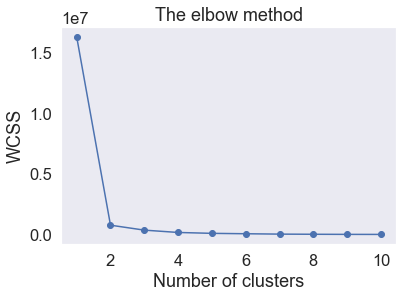

In [32]:
x = data.iloc[:, [ 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,marker='o',color='b')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

In [33]:
#k=2 selected.

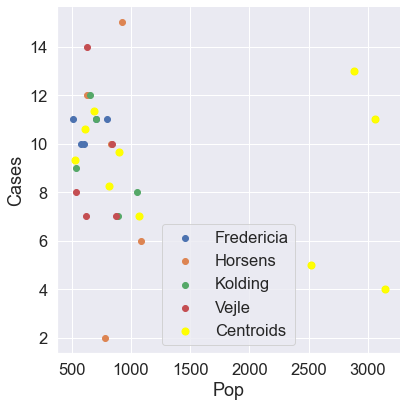

In [34]:

sns.FacetGrid(data, hue ="City",height = 6).map(plt.scatter,'Pop','Cases')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['City_N']=labelencoder.fit_transform(data['City'])
data['age']=labelencoder.fit_transform(data['Age'])
data

,City,Age,Pop,Cases,City_N,age
0,Fredericia,40-54,3059,11,0,0
1,Horsens,40-54,2879,13,1,0
2,Kolding,40-54,3142,4,2,0
3,Vejle,40-54,2520,5,3,0
4,Fredericia,55-59,800,11,0,1
5,Horsens,55-59,1083,6,1,1
6,Kolding,55-59,1050,8,2,1
7,Vejle,55-59,878,7,3,1
8,Fredericia,60-64,710,11,0,2
9,Horsens,60-64,923,15,1,2


In [37]:
relabel = np.choose(kmeans.labels_,[2,0,1]).astype(np.int64)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(data['City_N'],relabel))

              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.44      0.67      0.53         6
           2       0.27      0.50      0.35         6
           3       0.00      0.00      0.00         6

    accuracy                           0.33        24
   macro avg       0.24      0.33      0.27        24
weighted avg       0.24      0.33      0.27        24



c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


getting very low accuracy, the one reason is may be small sample size....as sample size will increase accuracy of model will increase. \
As of now, i will try to perform ANOVA

In [38]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data['City_N'], data['age'], data['Pop'], data['Cases'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05


40.633929323585285 8.185969561168295e-17


In [39]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Cases~age+City_N', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,0.914286,0.914286,0.091088,0.765767
City_N,1.0,17.633333,17.633333,1.756760,0.199269
Residual,21.0,210.785714,10.037415,NaN,NaN


Hypothesis for OLS
the null hypothesis: 𝐻0∶ 𝛽1 = 𝛽1,𝑠
the alternative hypothesis:𝐻1∶ 𝛽1 ≠ 𝛽1,s
- As here p-value>>0.05,0.01,0.1, we failed to reject the null hypothesis. or we can say that 𝛽1 is not significant/𝛽1 i.e unknown population parameter is equal to specific sample population parameter. 